In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/vgsales.csv')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.count()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [4]:
df.max()

Rank            16600.00
Year             2020.00
NA_Sales           41.49
EU_Sales           29.02
JP_Sales           10.22
Other_Sales        10.57
Global_Sales       82.74
dtype: float64

In [5]:
null_columns = df.columns[df.isnull().any()] #Rows where any colum has a NULL or empty value
df[null_columns].isnull().sum() #Sum the columns

Year         271
Publisher     58
dtype: int64

In [6]:
df = df.dropna() #Drop them
df.count()


Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [7]:
df.loc[df['Year'] == df['Year'].max()] #Checking any error in the max year value of the games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [8]:
df.at[5957, 'Year'] = 2009 #Change the value
df.loc[df['Rank'] == 5959]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2009.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [9]:
df['Year'].max()
df.loc[df['Year'] == df['Year'].max()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


In [10]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.404886,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.831475,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


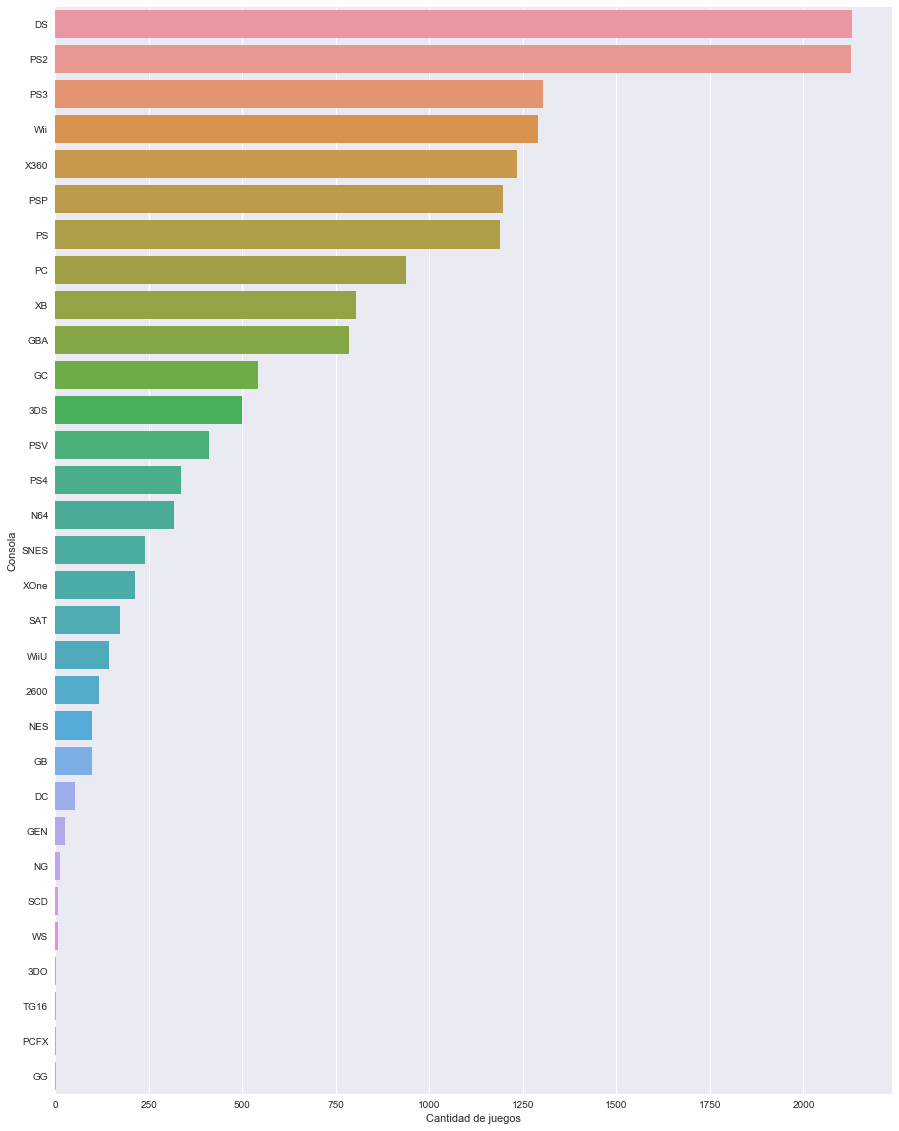

In [11]:
platform_genre = pd.crosstab(df.Platform, df.Genre) #I separeted the genre with their respective platform or console
platform_genreTotal = platform_genre.sum(axis=1).sort_values(ascending=False) #Sum all the genre
plt.figure(figsize=(15,20))
sns.barplot(y=platform_genreTotal.index, x=platform_genreTotal.values) # Index = Platform and get the values
plt.xlabel("Cantidad de juegos")
plt.ylabel("Consola")
plt.show()

In [12]:
genreGroup = df.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales'] 
#Suma todos los generos de por ventas y dame las columnas de ventas
print(genreGroup)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          861.77    516.48    158.65       184.92       1722.84
Adventure       101.93     63.74     51.99        16.70        234.59
Fighting        220.74    100.00     87.15        36.19        444.05
Misc            396.92    211.77    106.67        73.92        789.87
Platform        445.99    200.65    130.65        51.51        829.13
Puzzle          122.01     50.52     56.68        12.47        242.21
Racing          356.93    236.31     56.61        76.68        726.76
Role-Playing    326.50    187.57    350.29        59.38        923.83
Shooter         575.16    310.45     38.18       101.90       1026.20
Simulation      181.78    113.02     63.54        31.36        389.98
Sports          670.09    371.34    134.76       132.65       1309.24
Strategy         67.83     44.84     49.10        11.23        173.27


In [13]:
#Conviertelos en Porcentajes
genreGroup['NA_Sales%'] = genreGroup['NA_Sales']/genreGroup['Global_Sales']
genreGroup['EU_Sales%'] = genreGroup['EU_Sales']/genreGroup['Global_Sales']
genreGroup['JP_Sales%'] = genreGroup['JP_Sales']/genreGroup['Global_Sales']
genreGroup['Other_Sales%'] = genreGroup['Other_Sales']/genreGroup['Global_Sales']

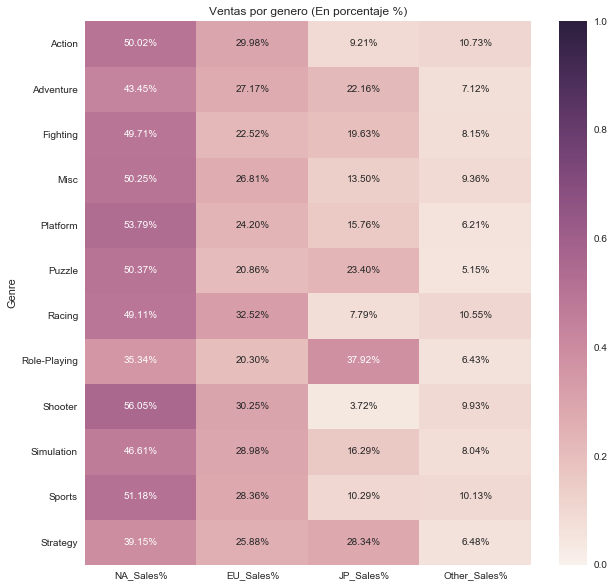

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(genreGroup.loc[:, 'NA_Sales%':'Other_Sales%'],vmax =1, vmin=0, annot=True ,fmt=".2%")
''''Agarramos las columnas desde NA_Sales hasta Other_Sales%, vmax ayuda a representar que 1 es lo 
mas bajo y el otro que cual es el más bajo. Con annot anotamos los valores y fmt pone el signo %'''
plt.title("Ventas por genero (En porcentaje %)")
plt.show()

In [15]:
platformGroup = df.groupby(['Platform']).sum().loc[:, 'NA_Sales':'Global_Sales']
print(platformGroup)

          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
2600         80.78      4.86      0.00         0.84         86.57
3DO           0.00      0.00      0.10         0.00          0.10
3DS          78.03     58.29     97.30        12.55        246.27
DC            5.43      1.69      8.56         0.27         15.97
DS          388.53    194.05    175.02        60.29        818.91
GB          113.64     47.51     85.12         8.16        254.42
GBA         178.43     72.49     46.56         7.51        305.62
GC          131.94     38.32     21.34         5.13        197.14
GEN          19.27      5.52      2.67         0.89         28.36
GG            0.00      0.00      0.04         0.00          0.04
N64         138.91     41.03     33.76         4.31        218.21
NES         125.94     21.15     98.65         5.31        251.07
NG            0.00      0.00      1.44         0.00          1.44
PC        

In [16]:
#Conviertelos en Porcentajes
platformGroup['NA_Sales%'] = platformGroup['NA_Sales']/platformGroup['Global_Sales']
platformGroup['EU_Sales%'] = platformGroup['EU_Sales']/platformGroup['Global_Sales']
platformGroup['JP_Sales%'] = platformGroup['JP_Sales']/platformGroup['Global_Sales']
platformGroup['Other_Sales%'] = platformGroup['Other_Sales']/platformGroup['Global_Sales']

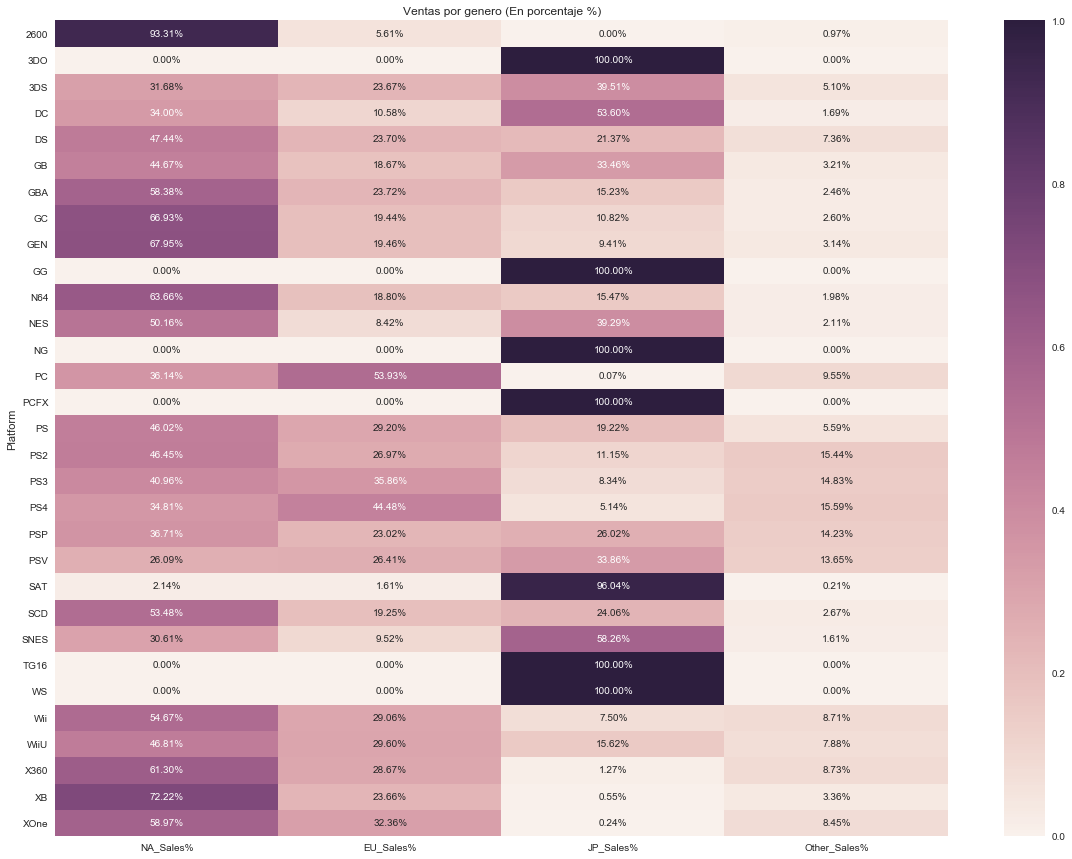

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(platformGroup.loc[:, 'NA_Sales%':'Other_Sales%'],vmax =1, vmin=0, annot=True ,fmt=".2%")
''''Agarramos las columnas desde NA_Sales hasta Other_Sales%, vmax ayuda a representar que 1 es lo 
mas bajo y el otro que cual es el más bajo. Con annot anotamos los valores y fmt pone el signo %'''
plt.title("Ventas por genero (En porcentaje %)")
plt.show()

In [18]:
platformGroup = platformGroup.sort_values('Global_Sales')

In [19]:
platformGroupTop10 = platformGroup.iloc[-10:]
platformGroupTop10

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Platform,,,,,,,,,
PC,92.04,137.35,0.17,24.33,254.70,0.361366,0.539262,0.000667,0.095524
PS4,96.80,123.70,14.30,43.36,278.10,0.348076,0.444804,0.051420,0.155915
PSP,107.09,67.16,75.89,41.52,291.71,0.367111,0.230229,0.260156,0.142333
GBA,178.43,72.49,46.56,7.51,305.62,0.583830,0.237190,0.152346,0.024573
PS,334.71,212.38,139.78,40.69,727.39,0.460152,0.291975,0.192167,0.055940
DS,388.53,194.05,175.02,60.29,818.91,0.474448,0.236961,0.213723,0.073622
Wii,497.37,264.35,68.28,79.20,909.81,0.546675,0.290555,0.075049,0.087051
PS3,388.90,340.47,79.21,140.81,949.35,0.409649,0.358635,0.083436,0.148323
X360,594.33,278.00,12.30,84.67,969.60,0.612964,0.286716,0.012686,0.087325


In [20]:
#Conviertelos en Porcentajes
platformGroupTop10['NA_Sales%'] = platformGroupTop10['NA_Sales']/platformGroupTop10['Global_Sales']
platformGroupTop10['EU_Sales%'] = platformGroupTop10['EU_Sales']/platformGroupTop10['Global_Sales']
platformGroupTop10['JP_Sales%'] = platformGroupTop10['JP_Sales']/platformGroupTop10['Global_Sales']
platformGroupTop10['Other_Sales%'] = platformGroupTop10['Other_Sales']/platformGroupTop10['Global_Sales']

C:\Users\Chenge\Anaconda3\envs\ztdl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chenge\Anaconda3\envs\ztdl\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chenge\Anaconda3\envs\ztdl\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [21]:
platformGroupTop10

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Sales%,EU_Sales%,JP_Sales%,Other_Sales%
Platform,,,,,,,,,
PC,92.04,137.35,0.17,24.33,254.70,0.361366,0.539262,0.000667,0.095524
PS4,96.80,123.70,14.30,43.36,278.10,0.348076,0.444804,0.051420,0.155915
PSP,107.09,67.16,75.89,41.52,291.71,0.367111,0.230229,0.260156,0.142333
GBA,178.43,72.49,46.56,7.51,305.62,0.583830,0.237190,0.152346,0.024573
PS,334.71,212.38,139.78,40.69,727.39,0.460152,0.291975,0.192167,0.055940
DS,388.53,194.05,175.02,60.29,818.91,0.474448,0.236961,0.213723,0.073622
Wii,497.37,264.35,68.28,79.20,909.81,0.546675,0.290555,0.075049,0.087051
PS3,388.90,340.47,79.21,140.81,949.35,0.409649,0.358635,0.083436,0.148323
X360,594.33,278.00,12.30,84.67,969.60,0.612964,0.286716,0.012686,0.087325


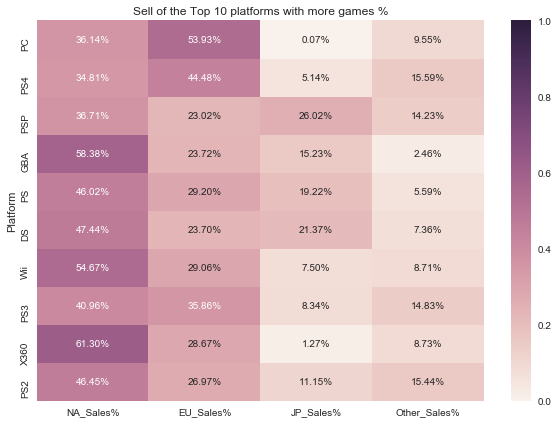

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(platformGroupTop10.loc[:, 'NA_Sales%':'Other_Sales%'],vmax =1, vmin=0, annot=True ,fmt=".2%")
plt.title("Sell of the Top 10 platforms with more games %")
plt.show()

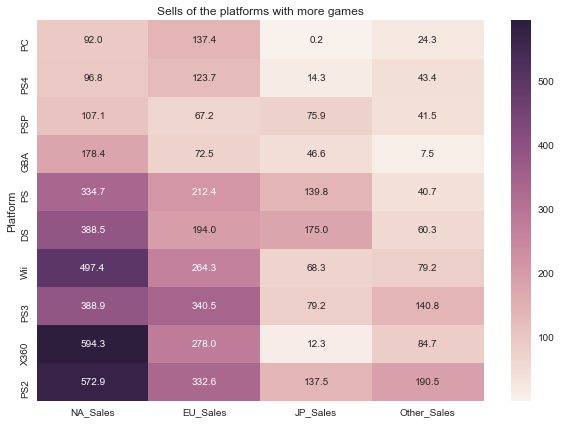

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(platformGroupTop10.loc[:, 'NA_Sales':'Other_Sales'], annot=True ,fmt=".1f")
plt.title("Sells of the platforms with more games")
plt.show()